In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn import neighbors, tree, naive_bayes
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [43]:
df = pd.read_csv("Crimes_-_2001_to_Present.csv")
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [44]:
df.isnull().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10730
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614849
Community Area          613476
FBI Code                     0
X Coordinate             88022
Y Coordinate             88022
Year                         0
Updated On                   0
Latitude                 88022
Longitude                88022
Location                 88022
dtype: int64

In [45]:
df = df.dropna()

In [46]:
df.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [47]:
place = pd.read_csv('CommAreas.csv')[['AREA_NUMBE','COMMUNITY']]

In [48]:
place

,AREA_NUMBE,COMMUNITY
0,35,DOUGLAS
1,36,OAKLAND
2,37,FULLER PARK
3,38,GRAND BOULEVARD
4,39,KENWOOD
...,...,...
72,74,MOUNT GREENWOOD
73,75,MORGAN PARK
74,76,OHARE
75,77,EDGEWATER


In [49]:
chicago = df.merge(place, how='inner', left_on='Community Area', right_on='AREA_NUMBE').drop(['Community Area', 'AREA_NUMBE'], axis=1)

In [50]:
chicago['DateTime'] = pd.to_datetime(chicago['Date'], format='%m/%d/%Y %I:%M:%S %p')
chicago['Hour'] = chicago['DateTime'].dt.hour
chicago['Day'] = chicago['DateTime'].dt.strftime('%A')
chicago = chicago.drop(['Date', 'DateTime'], axis=1)
chicago.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,COMMUNITY,Hour,Day
0,10224881,HY411873,044XX S UNIVERSITY AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,222,...,1184667.0,1875669.0,2015,02/10/2018 03:50:01 PM,41.813999,-87.598138,"(41.81399924, -87.598137918)",KENWOOD,18,Thursday
1,10225155,HY412177,007XX W IRVING PARK RD,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,True,False,1915,...,1170563.0,1926785.0,2015,02/10/2018 03:50:01 PM,41.954584,-87.648376,"(41.954584472, -87.648375776)",UPTOWN,22,Saturday
2,10225206,HY412253,047XX S STATE ST,041A,BATTERY,AGGRAVATED: HANDGUN,VACANT LOT/LAND,False,False,224,...,1177070.0,1873609.0,2015,02/10/2018 03:50:01 PM,41.808521,-87.626066,"(41.80852139, -87.62606631)",GRAND BOULEVARD,1,Sunday
3,10225234,HY412306,002XX N ST LOUIS AVE,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,1123,...,1153006.0,1901570.0,2015,02/10/2018 03:50:01 PM,41.885759,-87.713588,"(41.885759278, -87.713588042)",EAST GARFIELD PARK,2,Sunday
4,10225308,HY412341,013XX W ADDISON ST,2230,LIQUOR LAW VIOLATION,ILLEGAL CONSUMPTION BY MINOR,SIDEWALK,True,False,1923,...,1166847.0,1924028.0,2015,09/17/2015 11:37:18 AM,41.947100,-87.662116,"(41.947099832, -87.662115668)",LAKE VIEW,2,Sunday


In [51]:
crimes = chicago['Primary Type'].value_counts()
crime = pd.DataFrame(data=crimes.index, columns=["Primary Type"])
crime['values']=crimes.values
crime

,Primary Type,values
0,THEFT,1511412
1,BATTERY,1310040
2,CRIMINAL DAMAGE,818659
3,NARCOTICS,670047
4,ASSAULT,470941
5,OTHER OFFENSE,443565
6,BURGLARY,392010
7,MOTOR VEHICLE THEFT,345923
8,DECEPTIVE PRACTICE,306077
9,ROBBERY,270111


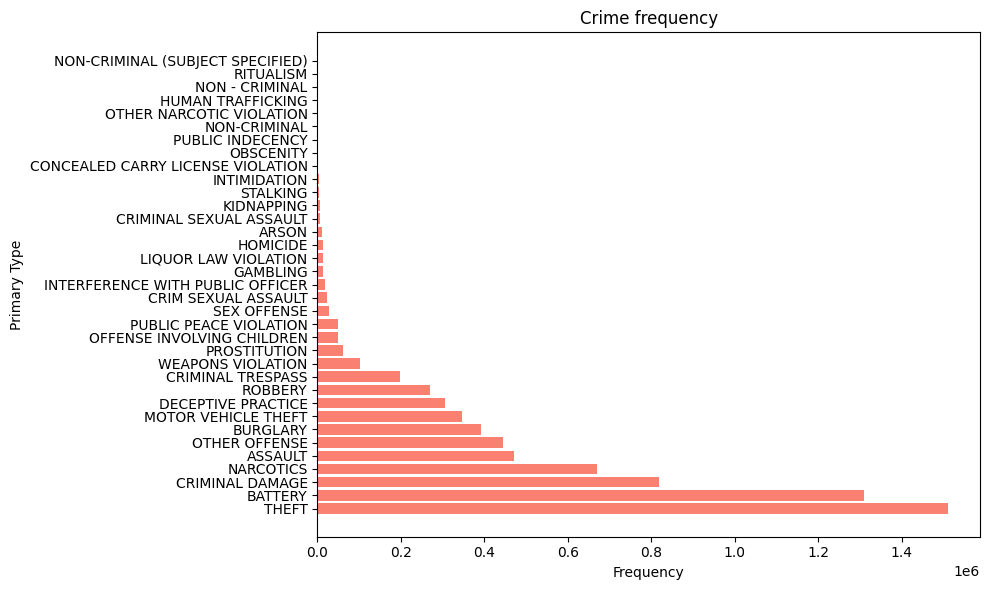

In [52]:
plt.figure(figsize=(10, 6))
plt.barh(crime['Primary Type'], crime['values'], color='salmon')
plt.title('Crime frequency')
plt.xlabel('Frequency')
plt.ylabel('Primary Type')
plt.tight_layout()
plt.show()

In [53]:
Number_crimes = chicago['COMMUNITY'].value_counts()
values = Number_crimes.values
categories = pd.DataFrame(data=Number_crimes.index, columns=["COMMUNITY"])
categories['values'] = values
categories

,COMMUNITY,values
0,AUSTIN,446599
1,NEAR NORTH SIDE,251220
2,SOUTH SHORE,236241
3,HUMBOLDT PARK,222874
4,NEAR WEST SIDE,216067
...,...,...
72,MOUNT GREENWOOD,16033
73,HEGEWISCH,15881
74,FOREST GLEN,13238
75,BURNSIDE,10726


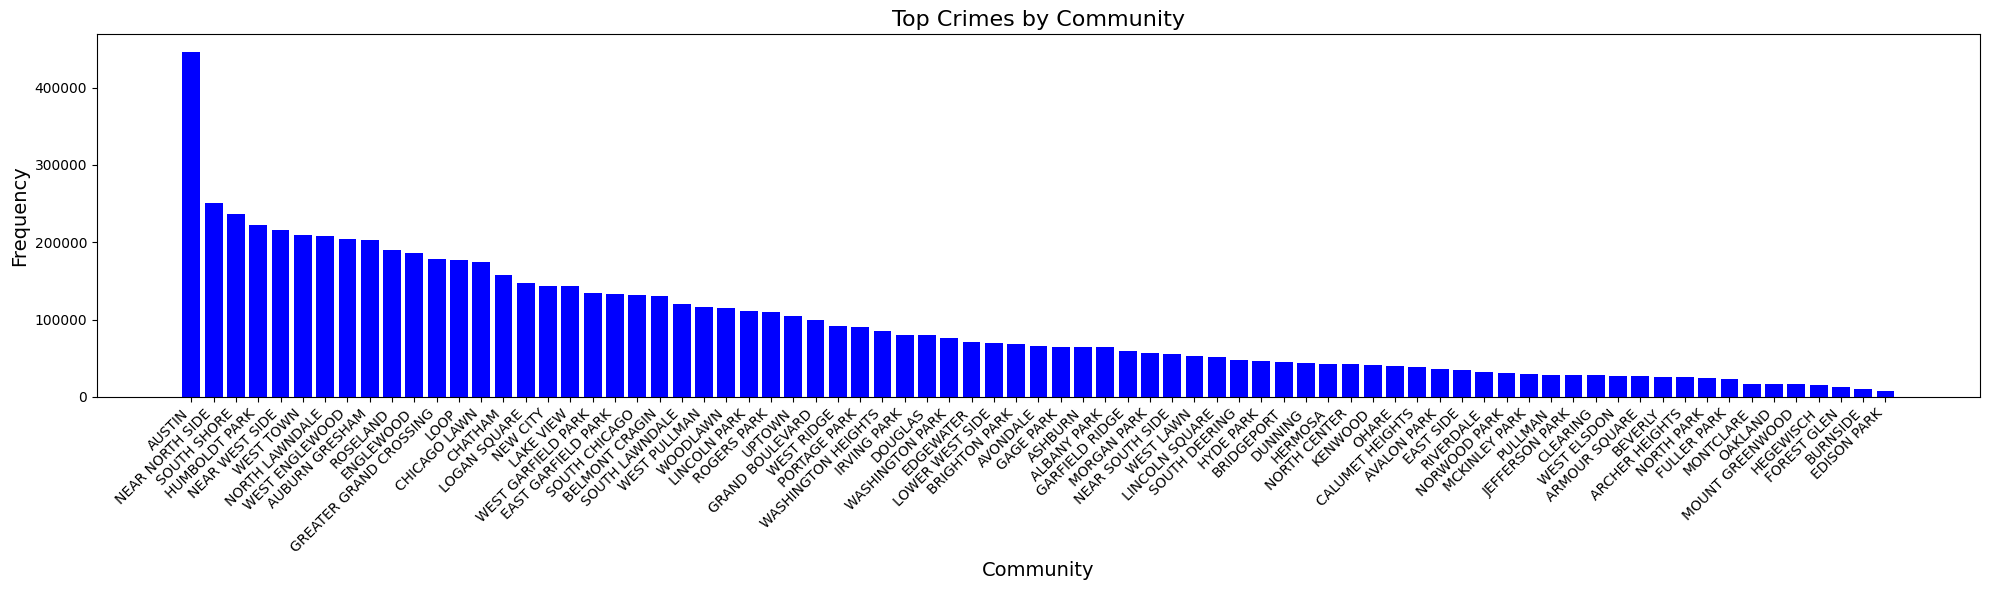

In [54]:
sorted_categories = categories.sort_values(by='values', ascending=False)
plt.figure(figsize=(20, 6))
plt.bar(sorted_categories['COMMUNITY'], sorted_categories['values'], color='blue')
plt.title('Top Crimes by Community', fontsize=16)
plt.xlabel('Community', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

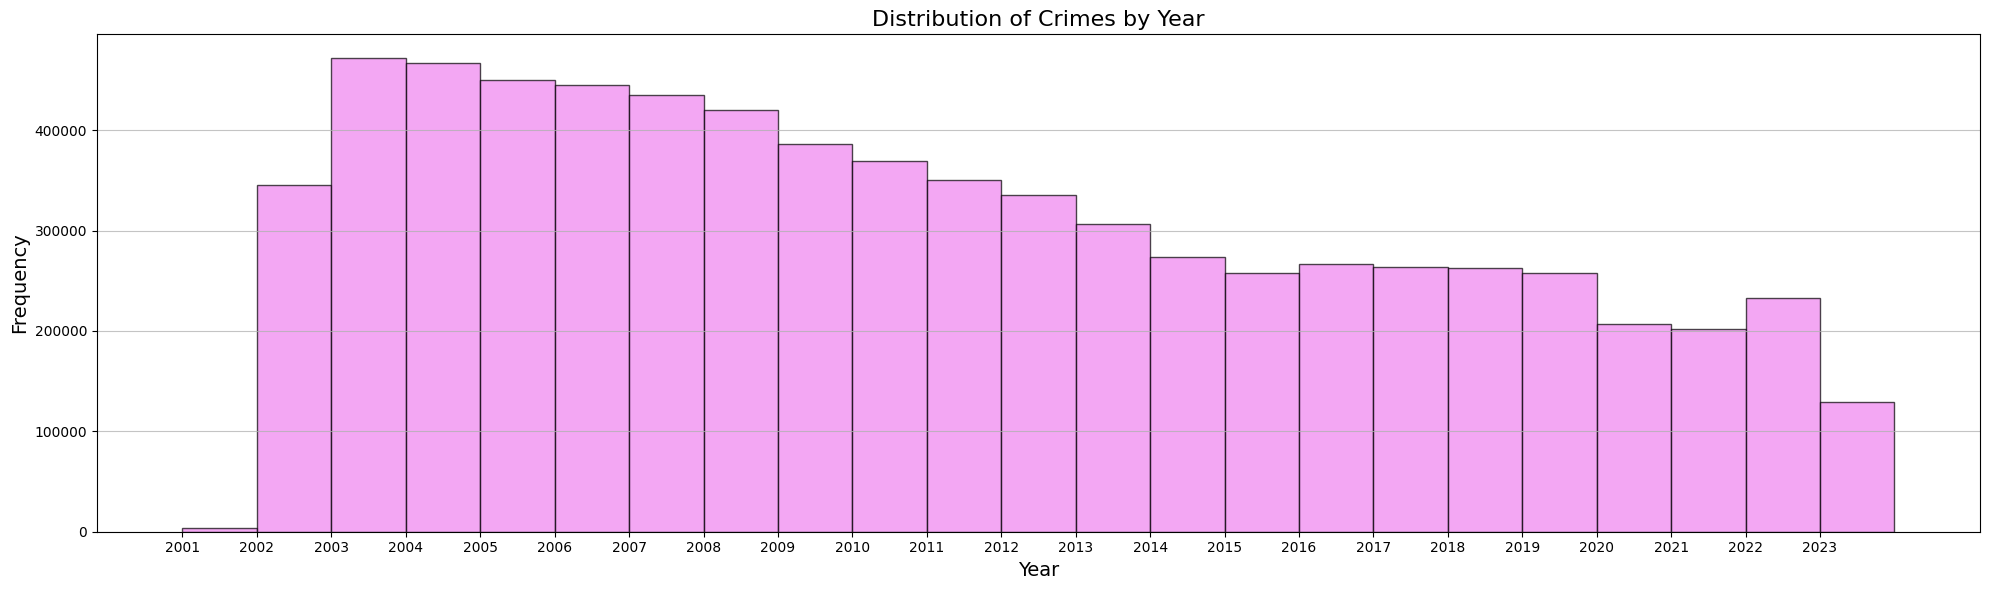

In [55]:
plt.figure(figsize=(20, 6))
plt.hist(chicago['Year'], bins=range(chicago['Year'].min(), chicago['Year'].max() + 2), color='violet', alpha=0.7, edgecolor='black')

plt.title('Distribution of Crimes by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(range(chicago['Year'].min(), chicago['Year'].max() + 1)) 
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

In [56]:
arrest = chicago.groupby('Arrest').size().reset_index(name='values')
arrest['Arrested'] = arrest['Arrest'].replace({True: 'Yes', False: 'No'})

# Drop the 'Arrest' column to keep only meaningful information
arrest = arrest[['Arrested', 'values']]
arrest

,Arrested,values
0,No,5300531
1,Yes,1840729


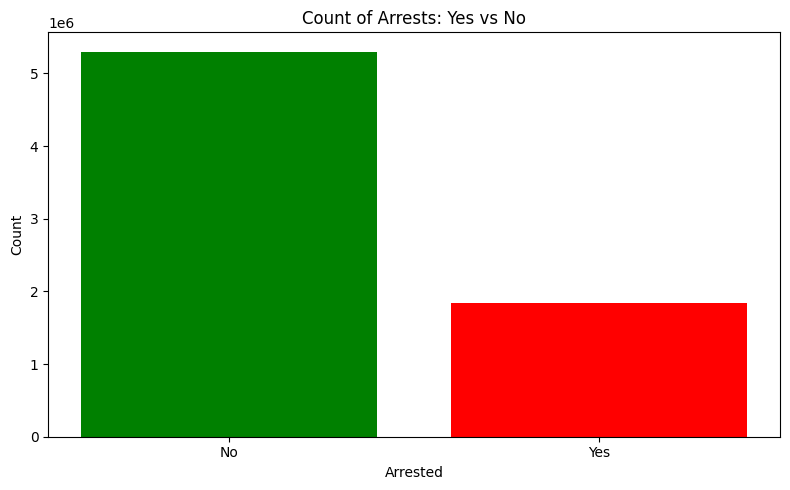

In [57]:
plt.figure(figsize=(8, 5))
plt.bar(arrest['Arrested'], arrest['values'], color=['green', 'red'])
plt.title('Count of Arrests: Yes vs No')
plt.xlabel('Arrested')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [59]:
df = df.sample(n=200000)
df = df.drop(['ID'], axis=1)
df = df.drop(['Case Number'], axis=1) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 4251439 to 3209907
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  200000 non-null  object 
 1   Block                 200000 non-null  object 
 2   IUCR                  200000 non-null  object 
 3   Primary Type          200000 non-null  object 
 4   Description           200000 non-null  object 
 5   Location Description  200000 non-null  object 
 6   Arrest                200000 non-null  bool   
 7   Domestic              200000 non-null  bool   
 8   Beat                  200000 non-null  int64  
 9   District              200000 non-null  float64
 10  Ward                  200000 non-null  float64
 11  Community Area        200000 non-null  float64
 12  FBI Code              200000 non-null  object 
 13  X Coordinate          200000 non-null  float64
 14  Y Coordinate          200000 non-null  float64
 15

In [60]:
df['date2'] = pd.to_datetime(df['Date'])
df['Year'] = df['date2'].dt.year
df['Month'] = df['date2'].dt.month
df['Day'] = df['date2'].dt.day
df['Hour'] = df['date2'].dt.hour
df['Minute'] = df['date2'].dt.minute
df['Second'] = df['date2'].dt.second 
df = df.drop(['Date'], axis=1) 
df = df.drop(['date2'], axis=1) 
df = df.drop(['Updated On'], axis=1)
df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day,Hour,Minute,Second
4251439,002XX W 90TH PL,0810,THEFT,OVER $500,STREET,False,False,634,6.0,21.0,...,1844823.0,2005,41.729546,-87.629611,"(41.729545876, -87.629611288)",6,10,6,10,0
5544670,012XX S CLINTON ST,0460,BATTERY,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,False,131,1.0,2.0,...,1894723.0,2008,41.866553,-87.640703,"(41.866552963, -87.640703373)",5,30,11,20,0
641555,057XX W HIGGINS AVE,0915,MOTOR VEHICLE THEFT,"TRUCK, BUS, MOTOR HOME",STREET,False,False,1622,16.0,45.0,...,1932774.0,2016,41.971694,-87.772667,"(41.971693805, -87.772667138)",6,30,4,0,0
4718877,027XX W CORTEZ ST,1330,CRIMINAL TRESPASS,TO LAND,RESIDENCE PORCH/HALLWAY,True,False,1311,12.0,1.0,...,1906874.0,2006,41.900213,-87.695016,"(41.900213002, -87.695015954)",5,30,0,45,0
1795378,041XX N MARINE DR,0820,THEFT,$500 AND UNDER,STREET,False,False,1915,19.0,46.0,...,1927608.0,2021,41.956829,-87.645973,"(41.956828595, -87.645973056)",3,10,18,0,0


In [61]:
df['Block'] = pd.factorize(df["Block"])[0]
df['IUCR'] = pd.factorize(df["IUCR"])[0]
df['Description'] = pd.factorize(df["Description"])[0]
df['Location Description'] = pd.factorize(df["Location Description"])[0]
df['FBI Code'] = pd.factorize(df["FBI Code"])[0]
df['Location'] = pd.factorize(df["Location"])[0] 

In [62]:
all_classes = df.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])
unwanted_classes = all_classes.tail(13)
unwanted_classes

,Primary Type,Amt
11,HOMICIDE,333
0,ARSON,326
7,CRIMINAL SEXUAL ASSAULT,174
15,KIDNAPPING,172
30,STALKING,127
14,INTIMIDATION,117
4,CONCEALED CARRY LICENSE VIOLATION,31
21,OBSCENITY,17
20,NON-CRIMINAL,6
26,PUBLIC INDECENCY,6


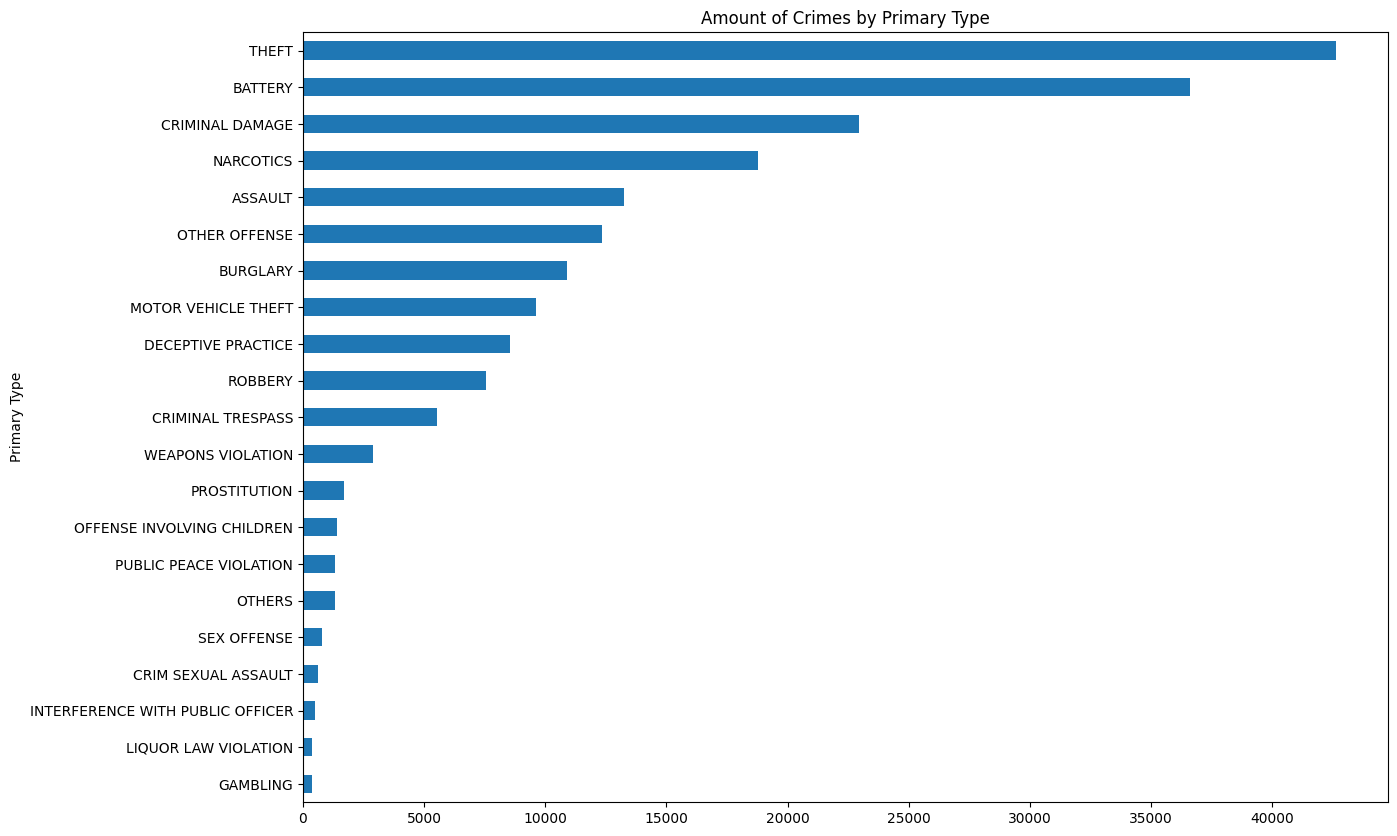

In [ ]:
df.loc[df['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [64]:
Classes = df['Primary Type'].unique()
Classes

array(['THEFT', 'BATTERY', 'MOTOR VEHICLE THEFT', 'CRIMINAL TRESPASS',
       'ROBBERY', 'CRIMINAL DAMAGE', 'OTHERS', 'NARCOTICS', 'ASSAULT',
       'BURGLARY', 'OTHER OFFENSE', 'SEX OFFENSE', 'DECEPTIVE PRACTICE',
       'WEAPONS VIOLATION', 'PROSTITUTION', 'OFFENSE INVOLVING CHILDREN',
       'PUBLIC PEACE VIOLATION', 'LIQUOR LAW VIOLATION',
       'CRIM SEXUAL ASSAULT', 'GAMBLING',
       'INTERFERENCE WITH PUBLIC OFFICER'], dtype=object)

In [65]:
df['Primary Type'] = pd.factorize(df["Primary Type"])[0] 
df['Primary Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

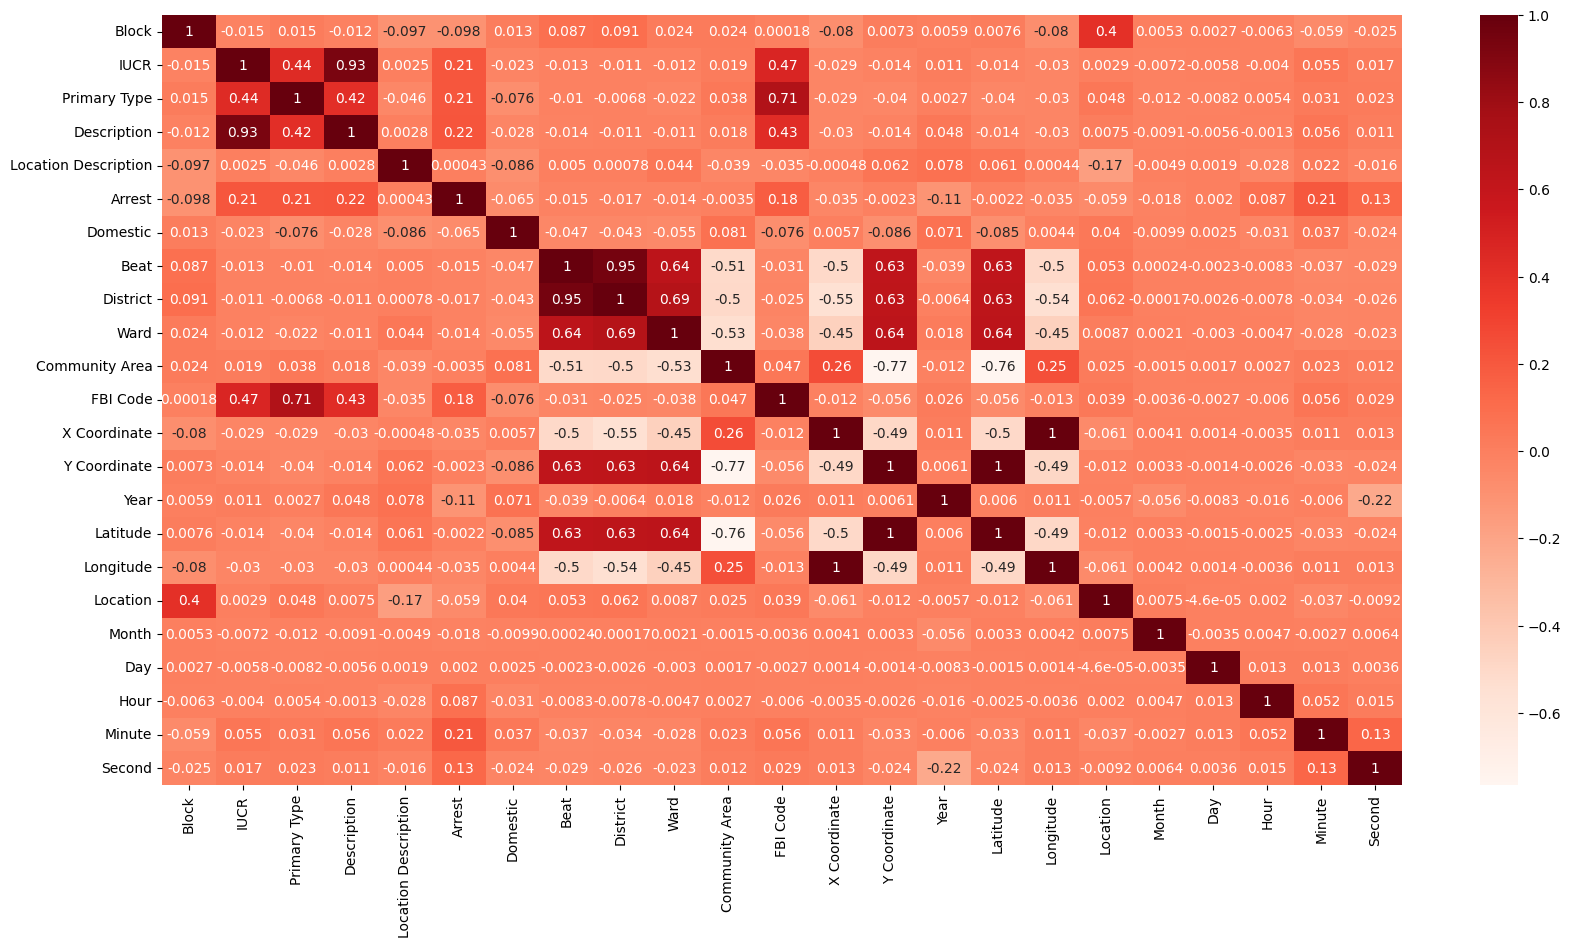

In [71]:
X_fs = df.drop(['Primary Type'], axis=1)
Y_fs = df['Primary Type']

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
cor_target = abs(cor['Primary Type'])
relevant_features = cor_target[cor_target>0.2]
relevant_features

IUCR            0.435026
Primary Type    1.000000
Description     0.419975
Arrest          0.211029
FBI Code        0.708860
Name: Primary Type, dtype: float64

In [74]:
Target = 'Primary Type'
Features = ["IUCR", "Description", "FBI Code"]
x, y = train_test_split(df, test_size = 0.2, train_size = 0.8, random_state= 3)
x1 = x[Features]    #train
x2 = x[Target]      
y1 = y[Features]    #test
y2 = y[Target]      

In [75]:
rf_model = RandomForestClassifier(n_estimators=70,min_samples_split = 30,bootstrap = True, max_depth = 50, min_samples_leaf = 25)
rf_model.fit(X=x1,y=x2)
result = rf_model.predict(y[Features])

In [ ]:
# Model Evaluation
ac = accuracy_score(y2, result)
print("========== Random Forest Results ==========")
print("Accuracy    : ", ac)

========== Random Forest Results ==========
Accuracy    :  0.99695
